1:Object creation

In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Creating a DataFrame by passing a NumPy array with a datetime index using date_range() and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
print(df)

                   A         B         C         D
2013-01-01  1.113175 -0.633126 -0.934251  0.159131
2013-01-02 -0.311862  0.975522 -0.962691  0.721785
2013-01-03 -0.414293 -0.247414  0.088348  1.203607
2013-01-04  0.100988  0.022637  1.013243 -0.024400
2013-01-05  0.086752 -0.002112 -0.501908  0.596005
2013-01-06 -0.108344 -0.012488 -1.588179  0.186080


Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [5]:
df2 = pd.DataFrame(
        {
            "A" : 1.0,
            "B" : pd.Timestamp("20130102"),
            "C" : pd.Series(1, index=list(range(4)),dtype="float32"),
            "D" : np.array([3]*4, dtype="int32"),
            "E" : pd.Categorical(["test","train","test","train"]),
            "F" : "foo",
        }
)
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


The columns of the resulting DataFrame have different dtypes:

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

2: Viewing data

Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:

In [7]:
df.head()

,A,B,C,D
2013-01-01,1.113175,-0.633126,-0.934251,0.159131
2013-01-02,-0.311862,0.975522,-0.962691,0.721785
2013-01-03,-0.414293,-0.247414,0.088348,1.203607
2013-01-04,0.100988,0.022637,1.013243,-0.024400
2013-01-05,0.086752,-0.002112,-0.501908,0.596005


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.100988,0.022637,1.013243,-0.024400
2013-01-05,0.086752,-0.002112,-0.501908,0.596005
2013-01-06,-0.108344,-0.012488,-1.588179,0.186080


Display the DataFrame.index or DataFrame.columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.to_numpy()

array([[ 1.11317527, -0.63312585, -0.93425111,  0.159131  ],
       [-0.31186206,  0.97552241, -0.96269102,  0.72178542],
       [-0.41429293, -0.24741436,  0.08834762,  1.20360715],
       [ 0.10098761,  0.02263661,  1.01324334, -0.02439951],
       [ 0.08675176, -0.00211235, -0.50190757,  0.59600516],
       [-0.10834427, -0.01248777, -1.58817859,  0.18608023]])

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe() shows a quick statistic summary of your data:

In [13]:
df

,A,B,C,D
2013-01-01,1.113175,-0.633126,-0.934251,0.159131
2013-01-02,-0.311862,0.975522,-0.962691,0.721785
2013-01-03,-0.414293,-0.247414,0.088348,1.203607
2013-01-04,0.100988,0.022637,1.013243,-0.024400
2013-01-05,0.086752,-0.002112,-0.501908,0.596005
2013-01-06,-0.108344,-0.012488,-1.588179,0.186080


In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.077736,0.017170,-0.480906,0.473702
std,0.547953,0.531528,0.918767,0.455862
min,-0.414293,-0.633126,-1.588179,-0.024400
25%,-0.260983,-0.188683,-0.955581,0.165868
50%,-0.010796,-0.007300,-0.718079,0.391043
75%,0.097429,0.016449,-0.059216,0.690340
max,1.113175,0.975522,1.013243,1.203607


Transposing your data:

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.113175,-0.311862,-0.414293,0.100988,0.086752,-0.108344
B,-0.633126,0.975522,-0.247414,0.022637,-0.002112,-0.012488
C,-0.934251,-0.962691,0.088348,1.013243,-0.501908,-1.588179
D,0.159131,0.721785,1.203607,-0.024400,0.596005,0.186080


DataFrame.sort_index() sorts by an axis:

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.159131,-0.934251,-0.633126,1.113175
2013-01-02,0.721785,-0.962691,0.975522,-0.311862
2013-01-03,1.203607,0.088348,-0.247414,-0.414293
2013-01-04,-0.024400,1.013243,0.022637,0.100988
2013-01-05,0.596005,-0.501908,-0.002112,0.086752
2013-01-06,0.186080,-1.588179,-0.012488,-0.108344


DataFrame.sort_values() sorts by values:

In [17]:
df.sort_values(by="C")

,A,B,C,D
2013-01-06,-0.108344,-0.012488,-1.588179,0.186080
2013-01-02,-0.311862,0.975522,-0.962691,0.721785
2013-01-01,1.113175,-0.633126,-0.934251,0.159131
2013-01-05,0.086752,-0.002112,-0.501908,0.596005
2013-01-03,-0.414293,-0.247414,0.088348,1.203607
2013-01-04,0.100988,0.022637,1.013243,-0.024400


3:Getitem ([])

For a DataFrame, passing a single label selects a columns and yields a Series equivalent to df.A:

In [18]:
df["A"]

2013-01-01    1.113175
2013-01-02   -0.311862
2013-01-03   -0.414293
2013-01-04    0.100988
2013-01-05    0.086752
2013-01-06   -0.108344
Freq: D, Name: A, dtype: float64

For a DataFrame, passing a slice : selects matching rows:

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,1.113175,-0.633126,-0.934251,0.159131
2013-01-02,-0.311862,0.975522,-0.962691,0.721785
2013-01-03,-0.414293,-0.247414,0.088348,1.203607


In [20]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.311862,0.975522,-0.962691,0.721785
2013-01-03,-0.414293,-0.247414,0.088348,1.203607
2013-01-04,0.100988,0.022637,1.013243,-0.024400


4: Selection by label

See more in Selection by Label using DataFrame.loc() or DataFrame.at().

In [21]:
#Selecting a row matching a label
df.loc[dates[0]]

A    1.113175
B   -0.633126
C   -0.934251
D    0.159131
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
#Selecting all rows (:) with a select column labels:
df.loc[:,["A","B"]]

,A,B
2013-01-01,1.113175,-0.633126
2013-01-02,-0.311862,0.975522
2013-01-03,-0.414293,-0.247414
2013-01-04,0.100988,0.022637
2013-01-05,0.086752,-0.002112
2013-01-06,-0.108344,-0.012488


In [23]:
#For label slicing, both endpoints are included:
df.loc["20130102":"20130104",["A","B"]]

,A,B
2013-01-02,-0.311862,0.975522
2013-01-03,-0.414293,-0.247414
2013-01-04,0.100988,0.022637


In [24]:
#Selecting a single row and column label returns a scalar:
df.loc[dates[0], "A"]

1.1131752697468187

In [25]:
#For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], "A"]

1.1131752697468187

5: Selection by position

See more in Selection by Position using DataFrame.iloc() or DataFrame.iat().

In [26]:
#Select via the position of the passed integers:
df.iloc[3]

A    0.100988
B    0.022637
C    1.013243
D   -0.024400
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
#Integer slices acts similar to NumPy/Python:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.100988,0.022637
2013-01-05,0.086752,-0.002112


In [28]:
#Lists of integer position locations:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,-0.311862,-0.962691
2013-01-03,-0.414293,0.088348
2013-01-05,0.086752,-0.501908


In [29]:
#For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.311862,0.975522,-0.962691,0.721785
2013-01-03,-0.414293,-0.247414,0.088348,1.203607


In [30]:
#For slicing columns explicitly:
df.iloc[: ,1:3]

,B,C
2013-01-01,-0.633126,-0.934251
2013-01-02,0.975522,-0.962691
2013-01-03,-0.247414,0.088348
2013-01-04,0.022637,1.013243
2013-01-05,-0.002112,-0.501908
2013-01-06,-0.012488,-1.588179


In [31]:
#For getting a value explicitly:
df.iloc[1,1]

0.9755224091404117

In [32]:
#For getting fast access to a scalar (equivalent to the prior method):
df.iat[1,1]

0.9755224091404117

6: Boolean indexing

In [33]:
#Select rows where df.A is greater than 0.
df[df["A"]>0]

,A,B,C,D
2013-01-01,1.113175,-0.633126,-0.934251,0.159131
2013-01-04,0.100988,0.022637,1.013243,-0.024400
2013-01-05,0.086752,-0.002112,-0.501908,0.596005


In [34]:
#Selecting values from a DataFrame where a boolean condition is met:
df[df > 0]

,A,B,C,D
2013-01-01,1.113175,NaN,NaN,0.159131
2013-01-02,NaN,0.975522,NaN,0.721785
2013-01-03,NaN,NaN,0.088348,1.203607
2013-01-04,0.100988,0.022637,1.013243,NaN
2013-01-05,0.086752,NaN,NaN,0.596005
2013-01-06,NaN,NaN,NaN,0.186080


In [35]:
#Using isin() method for filtering:
df2 = df.copy()
df2["E"] = ["one","one","two","three","four","three"]
df2

,A,B,C,D,E
2013-01-01,1.113175,-0.633126,-0.934251,0.159131,one
2013-01-02,-0.311862,0.975522,-0.962691,0.721785,one
2013-01-03,-0.414293,-0.247414,0.088348,1.203607,two
2013-01-04,0.100988,0.022637,1.013243,-0.024400,three
2013-01-05,0.086752,-0.002112,-0.501908,0.596005,four
2013-01-06,-0.108344,-0.012488,-1.588179,0.186080,three


In [36]:
df2[df2["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,-0.414293,-0.247414,0.088348,1.203607,two
2013-01-05,0.086752,-0.002112,-0.501908,0.596005,four


7: Setting

In [37]:
#Setting a new column automatically aligns the data by the indexes:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,1.113175,-0.633126,-0.934251,0.159131,NaN
2013-01-02,-0.311862,0.975522,-0.962691,0.721785,1.0
2013-01-03,-0.414293,-0.247414,0.088348,1.203607,2.0
2013-01-04,0.100988,0.022637,1.013243,-0.024400,3.0
2013-01-05,0.086752,-0.002112,-0.501908,0.596005,4.0
2013-01-06,-0.108344,-0.012488,-1.588179,0.186080,5.0


In [74]:
#Setting values by label:
df.at[dates[0], "A"] = 0

#Setting values by position:
df.iat[0,1] = 0

#Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5]*len(df))

df

,A,B,C,D,E
0,one,0,foo,5,0.855667
1,one,Y,foo,5,0.867926
2,two,Z,foo,5,0.593637
3,three,X,bar,5,0.483727
4,one,Y,bar,5,1.170638
5,one,Z,bar,5,-1.673648
6,two,X,foo,5,1.990627
7,three,Y,foo,5,1.353711
8,one,Z,foo,5,-0.125568
9,one,X,bar,5,1.282702


In [40]:
#A where operation with setting:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.934251,-5,NaN
2013-01-02,-0.311862,-0.975522,-0.962691,-5,-1.0
2013-01-03,-0.414293,-0.247414,-0.088348,-5,-2.0
2013-01-04,-0.100988,-0.022637,-1.013243,-5,-3.0
2013-01-05,-0.086752,-0.002112,-0.501908,-5,-4.0
2013-01-06,-0.108344,-0.012488,-1.588179,-5,-5.0


8: Missing data

For NumPy data types, np.nan represents missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [41]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E" ] =1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.934251,5,NaN,1.0
2013-01-02,-0.311862,0.975522,-0.962691,5,1.0,1.0
2013-01-03,-0.414293,-0.247414,0.088348,5,2.0,NaN
2013-01-04,0.100988,0.022637,1.013243,5,3.0,NaN


In [42]:
#DataFrame.dropna() drops any rows that have missing data:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.311862,0.975522,-0.962691,5,1.0,1.0


In [43]:
#DataFrame.fillna() fills missing data:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.934251,5,5.0,1.0
2013-01-02,-0.311862,0.975522,-0.962691,5,1.0,1.0
2013-01-03,-0.414293,-0.247414,0.088348,5,2.0,5.0
2013-01-04,0.100988,0.022637,1.013243,5,3.0,5.0


In [44]:
#isna() gets the boolean mask where values are nan:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


9: Operations

9.1: Stats

Operations in general exclude missing data.

In [45]:
#Calculate the mean value for each column:
df.mean()

A   -0.107793
B    0.122691
C   -0.480906
D    5.000000
F    3.000000
dtype: float64

In [46]:
#Calculate the mean value for each row:
df.mean(axis=1)

2013-01-01    1.016437
2013-01-02    1.140194
2013-01-03    1.285328
2013-01-04    1.827374
2013-01-05    1.716546
2013-01-06    1.658198
Freq: D, dtype: float64

In [47]:
#Operating with another Series or DataFrame with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with np.nan.

s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2) 
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [48]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.414293,-1.247414,-0.911652,4.0,1.0
2013-01-04,-2.899012,-2.977363,-1.986757,2.0,0.0
2013-01-05,-4.913248,-5.002112,-5.501908,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


9.2: User defined functions#

In [49]:
#DataFrame.agg() and DataFrame.transform() applies a user defined function that reduces or broadcasts its result respectively.
df.agg(lambda x : np.mean(x) * 5.6)

A    -0.603643
B     0.687068
C    -2.693075
D    28.000000
F    16.800000
dtype: float64

In [50]:
df.transform(lambda x : x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-94.546213,506.0,NaN
2013-01-02,-31.560441,98.722868,-97.424331,506.0,101.2
2013-01-03,-41.926444,-25.038333,8.940779,506.0,202.4
2013-01-04,10.219946,2.290825,102.540226,506.0,303.6
2013-01-05,8.779278,-0.213770,-50.793046,506.0,404.8
2013-01-06,-10.964440,-1.263762,-160.723673,506.0,506.0


9.3: Value Counts

In [51]:
#See more at Histogramming and Discretization.
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    4
2    0
3    1
4    1
5    3
6    6
7    5
8    3
9    0
dtype: int64

In [52]:
s.value_counts()

6    2
0    2
1    2
3    2
4    1
5    1
dtype: int64

9.4: String Methods

In [53]:
#Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. See more at Vectorized String Methods.

s = pd.Series(["A","B","C","Aaba","Baca",np.nan,"CABA","dog","cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

10: Merge

10.1 : Concat 
 
 pandas provides various facilities for easily combining together Series` and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [54]:
#Concatenating pandas objects together row-wise with concat():
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.706043,0.863391,0.040179,-0.719196
1,-0.061405,0.639948,1.448321,-1.278135
2,-1.043521,-0.594004,-0.345993,1.072442
3,-0.425622,1.877125,0.396430,0.733074
4,-1.496897,-1.450907,0.293875,-0.408120
5,-0.661988,0.504396,0.555555,-0.122337
6,-0.035922,0.080942,-1.760144,-0.310360
7,2.790736,-0.441084,-0.502342,-1.453898
8,-1.593924,-1.292593,-0.751111,-1.385513
9,-1.362706,-1.891704,1.120823,0.775673


In [55]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.706043,0.863391,0.040179,-0.719196
1,-0.061405,0.639948,1.448321,-1.278135
2,-1.043521,-0.594004,-0.345993,1.072442
3,-0.425622,1.877125,0.396430,0.733074
4,-1.496897,-1.450907,0.293875,-0.408120
5,-0.661988,0.504396,0.555555,-0.122337
6,-0.035922,0.080942,-1.760144,-0.310360
7,2.790736,-0.441084,-0.502342,-1.453898
8,-1.593924,-1.292593,-0.751111,-1.385513
9,-1.362706,-1.891704,1.120823,0.775673


Note

Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.


10.2: Join

merge() enables SQL style join types along specific columns. See the Database style joining section.

In [56]:
left = pd.DataFrame({"key": ["foo","foo"], "lval": [1,2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [57]:
right

,key,rval
0,foo,4
1,foo,5


In [58]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [59]:
#merge() on unique keys:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4,5]})
left

,key,lval
0,foo,1
1,bar,2


In [60]:
right

,key,rval
0,foo,4
1,bar,5


In [61]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


11: Grouping

In [62]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.535793,1.031424
1,bar,one,0.034004,0.012207
2,foo,two,1.603888,0.583481
3,bar,three,-2.484465,0.387102
4,foo,two,-0.916019,-1.432228
5,bar,two,1.906986,0.955193
6,foo,one,0.546895,-1.408504
7,foo,three,0.916655,-2.350247


Grouping by a column label, selecting column labels, and then applying the sum() function to the resulting groups:

In [63]:
# it is sum of all "bar" values in "C" and "D" column
#sum(c1+c3+c5)
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.543475,1.354502
foo,2.687211,-3.576074


In [64]:
#Grouping by multiple columns label forms MultiIndex.
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.034004  0.012207
    three -2.484465  0.387102
    two    1.906986  0.955193
foo one    1.082688 -0.377081
    three  0.916655 -2.350247
    two    0.687869 -0.848747

12: Reshaping

See the sections on Hierarchical Indexing and Reshaping.

12.1: Stack

In [65]:
arrays_1 = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays_1, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.297245  0.707846
      two    -0.048604  0.676306
baz   one     0.108407 -0.036669
      two     0.004981 -0.958279

In [66]:
#The stack() method “compresses” a level in the DataFrame’s columns:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.297245
               B    0.707846
       two     A   -0.048604
               B    0.676306
baz    one     A    0.108407
               B   -0.036669
       two     A    0.004981
               B   -0.958279
dtype: float64

In [67]:
#With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

stacked.unstack()

A         B
first second                    
bar   one     0.297245  0.707846
      two    -0.048604  0.676306
baz   one     0.108407 -0.036669
      two     0.004981 -0.958279

In [68]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.297245 -0.048604
      B  0.707846  0.676306
baz   A  0.108407  0.004981
      B -0.036669 -0.958279

In [69]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.297245  0.108407
       B  0.707846 -0.036669
two    A -0.048604  0.004981
       B  0.676306 -0.958279

12.2: Pivot tables

In [70]:
#See the section on Pivot Tables.
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["X", "Y", "Z"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,X,foo,-0.918965,0.855667
1,one,Y,foo,0.271260,0.867926
2,two,Z,foo,-0.174420,0.593637
3,three,X,bar,0.718123,0.483727
4,one,Y,bar,-0.283031,1.170638
5,one,Z,bar,1.522556,-1.673648
6,two,X,foo,0.700571,1.990627
7,three,Y,foo,1.500764,1.353711
8,one,Z,foo,1.731057,-0.125568
9,one,X,bar,-0.052705,1.282702


In [71]:
#pivot_table() pivots a DataFrame specifying the values, index and columns
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   X -0.052705 -0.918965
      Y -0.283031  0.271260
      Z  1.522556  1.731057
three X  0.718123       NaN
      Y       NaN  1.500764
      Z -2.565934       NaN
two   X       NaN  0.700571
      Y  1.392490       NaN
      Z       NaN -0.174420

13: Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [75]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    26620
Freq: 5T, dtype: int64

In [76]:
#Series.tz_localize() localizes a time series to a time zone:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.232927
2012-03-07   -0.453965
2012-03-08    1.137293
2012-03-09   -0.428160
2012-03-10   -0.924965
Freq: D, dtype: float64

In [77]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.232927
2012-03-07 00:00:00+00:00   -0.453965
2012-03-08 00:00:00+00:00    1.137293
2012-03-09 00:00:00+00:00   -0.428160
2012-03-10 00:00:00+00:00   -0.924965
Freq: D, dtype: float64

In [78]:
#Series.tz_convert() converts a timezones aware time series to another time zone:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.232927
2012-03-06 19:00:00-05:00   -0.453965
2012-03-07 19:00:00-05:00    1.137293
2012-03-08 19:00:00-05:00   -0.428160
2012-03-09 19:00:00-05:00   -0.924965
Freq: D, dtype: float64

In [79]:
#Adding a non-fixed duration (BusinessDay) to a time series:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [80]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

14: Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [81]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

#Converting the raw grades to a categorical data type:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [82]:
#Rename the categories to more meaningful names:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

#Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

df["grade"] = df["grade"].cat.set_categories(
        ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [83]:
#Sorting is per order in the categories, not lexical order:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [84]:
#Grouping by a categorical column with observed=False also shows empty categories:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

15: Plotting

We use the standard convention for referencing the matplotlib API:

<AxesSubplot:>

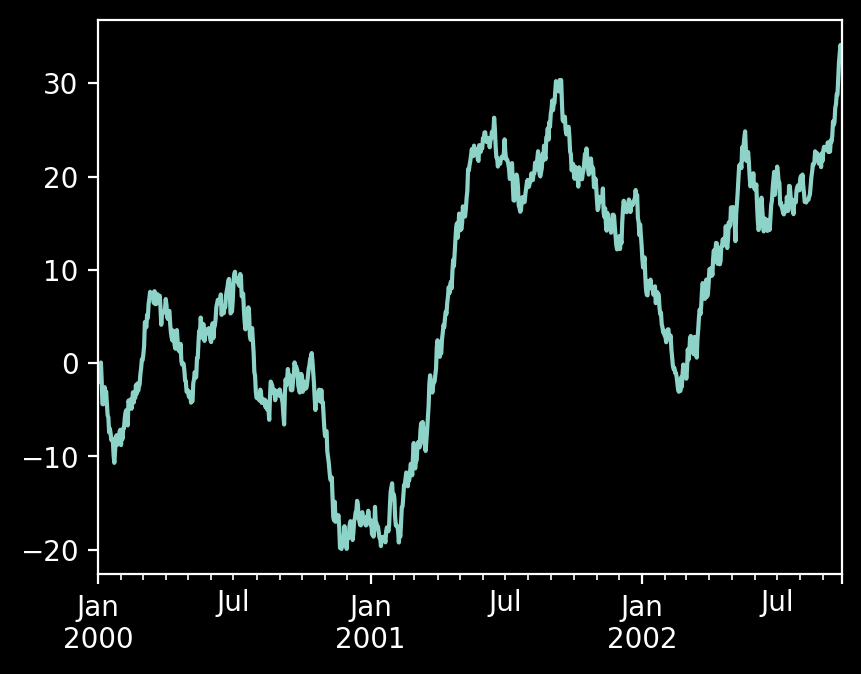

In [85]:
import matplotlib.pyplot as plt
plt.close("all")
#The plt.close method is used to close a figure window:

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 480x360 with 0 Axes>

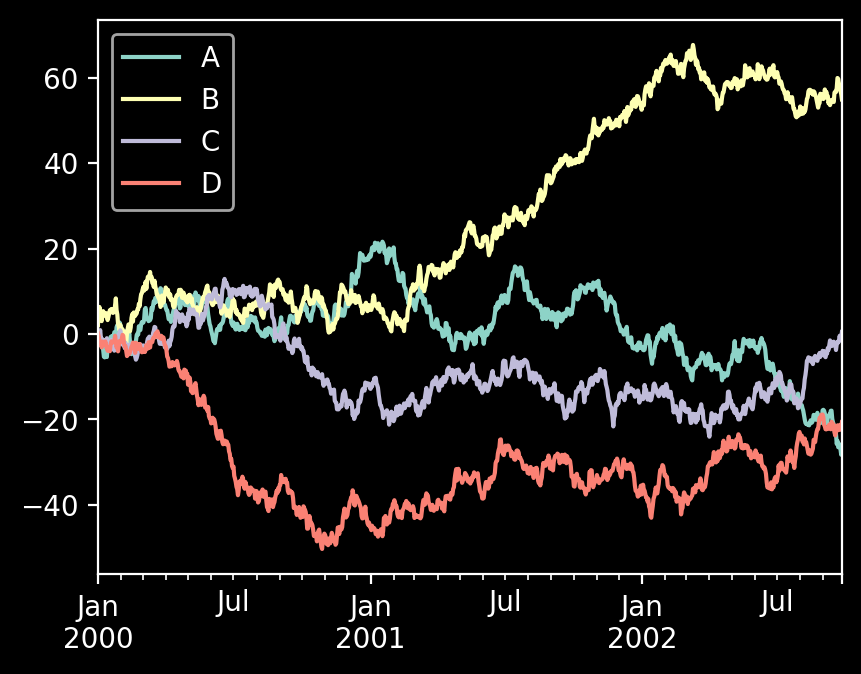

In [86]:
df = pd.DataFrame(
        np.random.randn(1000, 4), index=ts.index, 
        columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

16: Importing and exporting data

16.1: Writing to a csv file: using DataFrame.to_csv()

In [87]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

#Reading from a csv file: using read_csv()
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,4,0,2,3,0
1,1,0,0,4,3,0
2,2,3,2,2,0,0
3,3,3,4,0,3,1
4,4,3,1,0,1,4
5,5,2,1,2,1,1
6,6,0,1,1,0,2
7,7,2,2,0,4,2
8,8,3,3,0,1,4
9,9,1,2,0,1,2


16.2: Excel

In [88]:
#Writing to an excel file using DataFrame.to_excel():
df.to_excel("foo.xlsx", sheet_name="Sheet1")

#Reading from an excel file using read_excel():
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,4,0,2,3,0
1,1,0,0,4,3,0
2,2,3,2,2,0,0
3,3,3,4,0,3,1
4,4,3,1,0,1,4
5,5,2,1,2,1,1
6,6,0,1,1,0,2
7,7,2,2,0,4,2
8,8,3,3,0,1,4
9,9,1,2,0,1,2
